<a href="https://colab.research.google.com/github/anjimenezp/Matematicas_Discretas_II_2025964/blob/master/Automorfismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="UN logo" height="80px" src="https://unal.edu.co/typo3conf/ext/unal_skin_default/Resources/Public/images/escudoUnal_black.png" align="right" hspace="0px" vspace="0px"></p>

<H1 align="center"> Automorfismo de Grafos </H1>
<h3 align="center">Andrés Felipe Jiménez Pérez</h3>
<h3 align="center">2025964 - Matemáticas Discretas II - Grupo 1</h3>
<h4 align="center">UNIVERSIDAD NACIONAL DE COLOMBIA</h4>
<h3 align="center">Julio 11, 2020</h3>

## **1. Introducción**

**Automorfismo es el conjunto de todos los grafos que son isomorfos después de permutarlos a los grafos originales.**

A continuación se presenta el algoritmo en lenguaje natural, que dado un grafo $\Gamma = (v, \varepsilon)$ se retorna su grupo de automorfismos.

1. Representar el grafo con su matriz de adyacencia.
2. Aplicar todas las permutaciones al grafo.
3. Verificar cuáles generan grafos isomorfos.

La búsqueda de bajar la complejidad algorítmica, es el problema de cualquier algoritmo.

La implementación del algoritmo se verificó con la página WOLFRAM Demonstrations Project, Graph Automorphisms (ver Referencia [1]).

## **2. Ejemplo**

El grafo mostrado a continuación (_CrossGraph_), fue evaluado por el algoritmo desarrollado en el presente documento, y retorna de manera satisfactoria su grupo de automorfismos.

<p><img alt="CrossGraph" height="180px" src="https://mathworld.wolfram.com/images/eps-gif/CrossGraph_1000.gif" align="center" hspace="0px" vspace="0px"></p>

La siguiente imagen muestra la página WOLFRAM Demonstrations Project, Graph Automorphisms (ver Referencia [1]), evaluando el grafo _CrossGraph_ y retornando su grupo de automorfismos.

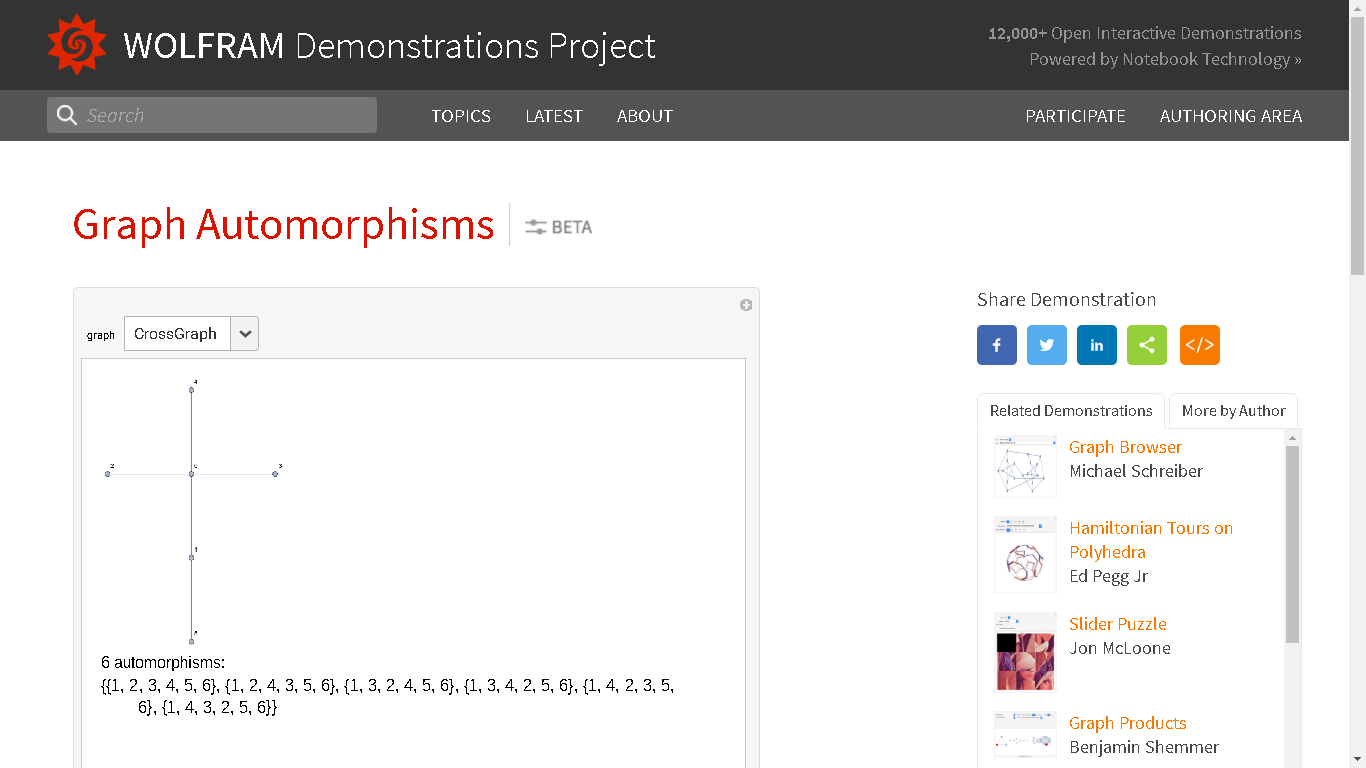

## **3. Implementación**

In [2]:
import itertools
import numpy as np

def ady_matrix(num_vertices, edges):
    dimension = (num_vertices, num_vertices)
    arr = np.zeros(dimension)
    if(len(edges) == 0): 
        pass
    elif(len(edges) == 2):
        arr[int(edges[0]),int(edges[1])] = 1
    else:
        for i in range(0, len(edges) - 1, 2):
            arr[int(edges[i]) - 1, int(edges[i+1]) - 1] = 1
            arr[int(edges[i+1]) - 1, int(edges[i]) - 1] = 1
    return arr            

def create_graph():
    while True:
        try:    
            print("\n#########################")
            print("# # # # # # # # # # # # #")

            print("\nGrafo Γ=(v,ε) ")
            print("\nIngrese número de vértices: ")
            num_vertices = int(input())
            print("\nIngrese aristas (vértices >= 1) como " +
                "\n# # , 2# 2# , 3# 3#")
            edges = input().split(" ")
            while "," in edges:
                edges.remove(",")
            ady_matrix1 = ady_matrix(num_vertices, edges)
            return ady_matrix1, num_vertices
            break
        except (RuntimeError, TypeError, NameError, ValueError, OverflowError):
            print("\nDatos incorrectos...")            

def permute_vert(num_vertices):
    permutations_list = []
    for i in range(0, num_vertices):
        permutations_list.append(i)
    return list(itertools.permutations(permutations_list))

def permute_graph(matriz_ady, num_vertices):
    contador = 0
    permutation = []
    permutarions_vert = permute_vert(num_vertices)
    for i in permutarions_vert:
        matriz1 = matriz_ady[i,:]
        matriz2 = matriz1[:,i]
        compare(matriz_ady, matriz2)   
        if(compare(matriz_ady, matriz2) == True):           
            if (contador == 0):
                print("\nAut(Γ) = {")
                for j in i:
                    permutation.append(j+1)
                print(f"{permutation}")
                permutation.clear()                
            else:
                for j in i:
                    permutation.append(j+1)
                print(f"\n{permutation}")
                permutation.clear()
            contador+=1
    print("}")            
    print(f"\nAut(Γ) tiene {contador} elementos.") 
    return contador

def compare(matriz_ady, matriz_permuted):
    if((matriz_ady == matriz_permuted).all()):
        #Es isomorfo
        return True
    else:
        #No es isomorfo
        return False

def main():    
    while True:
        print("\nxXX Automorfismo de Grafos XXx")
        print("\nPor favor selecione el modo: ")    
        print("\t0. Salir")
        print("\t1. Dado un grafo Γ=(v,ε) se retorna su grupo de automorfismos.")
        modo = input()
        if int(modo) == 0:
            break
        elif int(modo) == 1:
            matriz_ady, num_vertices = create_graph()
            permute_graph(matriz_ady, num_vertices)  
    
main()


xXX Automorfismo de Grafos XXx

Por favor selecione el modo: 
	0. Salir
	1. Dado un grafo Γ=(v,ε) se retorna su grupo de automorfismos.
1

#########################
# # # # # # # # # # # # #

Grafo Γ=(v,ε) 

Ingrese número de vértices: 
6

Ingrese aristas (vértices >= 1) como 
# # , 2# 2# , 3# 3#
4 6 , 2 6 , 6 3 , 6 1 , 1 5

Aut(Γ) = {
[1, 2, 3, 4, 5, 6]

[1, 2, 4, 3, 5, 6]

[1, 3, 2, 4, 5, 6]

[1, 3, 4, 2, 5, 6]

[1, 4, 2, 3, 5, 6]

[1, 4, 3, 2, 5, 6]
}

Aut(Γ) tiene 6 elementos.

xXX Automorfismo de Grafos XXx

Por favor selecione el modo: 
	0. Salir
	1. Dado un grafo Γ=(v,ε) se retorna su grupo de automorfismos.
0


## **Referencias**


> [1] 	WOLFRAM Demonstrations Project, Graph Automorphisms, 2020. [Online]. Disponible en: https://demonstrations.wolfram.com/GraphAutomorphisms/. [Acceso: 10- Jul- 2020].